In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [3]:
df.shape

(9134, 24)

In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# check variable of 'Response'
df['Response'].describe() # count:non-null value, unique: only value, top: at top value: freq: the hightest frequence

count     9134
unique       2
top         No
freq      7826
Name: Response, dtype: object

In [7]:
# 1: yes, engaged, 0:no, not engaged
df['EngagementStatus'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)

In [8]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,EngagementStatus
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


In [9]:
# calculate emgagement rate
engagement_rate_df = pd.DataFrame(
    df.groupby('EngagementStatus').count()['Response'] / df.shape[0] * 100.0
)
engagement_rate_df.T

EngagementStatus,0,1
Response,85.679877,14.320123


<font color=black size=5>*About 14% of the customers have responded to marketing calls, and the remaining 86% of the customers have not responded.*</font>


In [10]:
# analyze how the engaged and non-engaged customers are distributed among different sales channels
engagement_by_offer_type_df = pd.pivot_table(
    df, values='Response', index='Sales Channel', columns='EngagementStatus', aggfunc=len
).fillna(0.0)

engagement_by_offer_type_df.columns = ['Not Engaged', 'Engaged']
engagement_by_offer_type_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


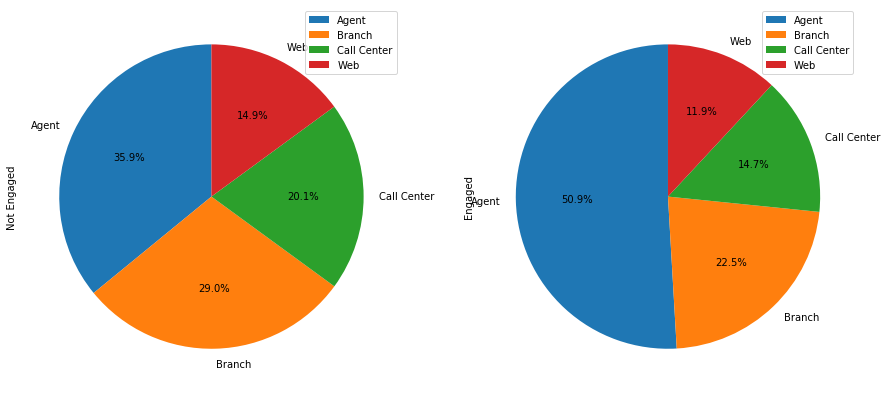

In [11]:
engagement_by_offer_type_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90, # Counterclockwise start angle setting
    subplots=True, # there has subplots
    autopct=lambda x: '%0.1f%%' % x  # Values remain fixed decimal places
)

plt.show()

<font color=black size=5>*More than half of the engaged customers were from Agent, whereas non-engaged customers are more evenly distributed across all four different channels but Agent accounts for the most.*</font>


#  continuous variables in Logit Regression


In [12]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,EngagementStatus
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [13]:
print(df['Customer Lifetime Value'].dtype)
print(df['Income'].dtype)
print(df['Monthly Premium Auto'].dtype)
print(df['Months Since Last Claim'].dtype)
print(df['Months Since Policy Inception'].dtype)
print(df['Number of Open Complaints'].dtype)
print(df['Number of Policies'].dtype)
print(df['Total Claim Amount'].dtype)

float64
int64
int64
int64
int64
int64
int64
float64


In [14]:
continuous_vars = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 
    'Total Claim Amount'
]


In [16]:
logit_continuous = sm.Logit(df['EngagementStatus'], df[continuous_vars])
logit_continuous_fit = logit_continuous.fit()
logit_continuous.summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


AttributeError: 'Logit' object has no attribute 'summary'

<font color=black size=5>*Typically, 0.05 is a good cut-off point for the p-value, and any value less than 0.05 signifies a strong relationship between the given feature and the output variable.Thus, the variables of "Customer Lifetime Value" and "Total Claim Amount" should not be considered*</font>

# categorical variables in Logit Regression


In [17]:
# handle with Gender
gender_values, gender_labels = df['Gender'].factorize()
print(gender_values)
print(gender_labels)
df['GenderFactorized'] = gender_values

[0 0 0 ... 1 1 1]
Index(['F', 'M'], dtype='object')


<font color=black size=5>*0 symbolizes female (F) and 1 symbolizes male (M).*</font>

In [18]:
# handle with Education
categories = pd.Categorical(
       df['Education'],
       categories=['High School or Below', 'Bachelor', 'College', 'Master','Doctor']
)
df['EducationFactorized'] = categories.codes

In [19]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,EngagementStatus,GenderFactorized,EducationFactorized
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0,1,1
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1,0,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0,1,1
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0,1,2


In [20]:
logit_categorical = sm.Logit(
       df['EngagementStatus'],
       df[['GenderFactorized','EducationFactorized']] 
)
logit_categorical_fit = logit_categorical.fit()
logit_categorical_fit.summary()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       EngagementStatus   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                 -0.2005
Time:                        14:21:48   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

<font color=black size=5>*both the GenderFactorized and EducationFactorized variables seem to have significant relationships with the output variable EngagementStatus.*</font>



# Combining continuous and categorical variables in Logit Regression

In [21]:
logit_continuous_categorical = sm.Logit(
    df['EngagementStatus'], 
    df[['Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'GenderFactorized',
        'EducationFactorized'
    ]]
)
logit_continuous_categorical_fit = logit_continuous_categorical.fit()
logit_continuous_categorical_fit.summary()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       EngagementStatus   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                -0.02454
Time:                        14:21:49   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

<font color=black size=5>*The Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, and GenderFactorized variable are significant at a 0.05 significance level, and all of them have negative relationships with the output variable, EngagementStatus. Hence, the higher the income is, the less likely that the customer will be engaged with marketing calls. Similarly, the more policies that the customer has, the less likely that he or she will be engaged with marketing calls.*</font>